In [0]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from pprint import pprint
import seaborn as sns
import random
%matplotlib inline

googleplay_df=pd.read_csv("/content/gdrive/My Drive/CS210 Project/googleplaystore.csv")
googleplay_df.head()

Mounted at /content/gdrive


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Information About Features

___App:___ 

___Category:___ 

___Rating:___ 

___Reviews:___ 

___Size:___ 

___Installs:___

___Type:___ 

___Price:___ 

___Content Rating:___ 

___Genres:___ 

___Current Ver:___ 

___Android Ver:___ 


In [0]:
googleplay_df.describe(include =['object', 'float', 'int'] )

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
googleplay_df.shape

(10841, 13)

In [0]:
type_df = pd.DataFrame(googleplay_df.dtypes,columns=['Type of Columns'])
type_df

,Type of Columns
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [0]:
googleplay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [0]:
googleplay_df.drop_duplicates(keep=False,inplace=True) #remove duplicates rows
googleplay_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9948 entries, 0 to 10840
Data columns (total 13 columns):
App               9948 non-null object
Category          9948 non-null object
Rating            8491 non-null float64
Reviews           9948 non-null object
Size              9948 non-null object
Installs          9948 non-null object
Type              9947 non-null object
Price             9948 non-null object
Content Rating    9947 non-null object
Genres            9948 non-null object
Last Updated      9948 non-null object
Current Ver       9940 non-null object
Android Ver       9945 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [0]:
columns_df=pd.DataFrame(googleplay_df.columns,columns=['COLUMNS'])
columns_df

,COLUMNS
0,App
1,Category
2,Rating
3,Reviews
4,Size
5,Installs
6,Type
7,Price
8,Content Rating
9,Genres


In [0]:
null_df=pd.DataFrame(googleplay_df.isnull().any(),columns=['ISNULL'])
null_df

,ISNULL
App,False
Category,False
Rating,True
Reviews,False
Size,False
Installs,False
Type,True
Price,False
Content Rating,True
Genres,False


In [0]:
isnul_df = pd.DataFrame(googleplay_df.isnull().sum(axis=0),columns=['NULLNUMBER'])
isnul_df

,NULLNUMBER
App,0
Category,0
Rating,1457
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [0]:
total =googleplay_df.isnull().sum().sort_values(ascending=False)
percent = (googleplay_df.isnull().sum()/googleplay_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
miss_df = pd.DataFrame(missing_data)
miss_df


,Total,Percent
Rating,1457,0.146462
Current Ver,8,0.000804
Android Ver,3,0.000302
Content Rating,1,0.000101
Type,1,0.000101
Last Updated,0,0.000000
Genres,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


In [0]:
unique_df = pd.DataFrame(googleplay_df['Category'].unique(),columns=['UNIQUE'])
unique_df

,UNIQUE
0,ART_AND_DESIGN
1,AUTO_AND_VEHICLES
2,BEAUTY
3,BOOKS_AND_REFERENCE
4,BUSINESS
5,COMICS
6,COMMUNICATION
7,DATING
8,EDUCATION
9,ENTERTAINMENT


In [0]:
googleplay_df['Rating'] = googleplay_df.groupby(['Category'])['Rating'].apply(lambda x: x.fillna(x.mean())) ##Group categories and fill the nan values with categories's ratings mean 
#print(googleplay_df.isnull().sum(axis=0))

isn_df = pd.DataFrame(googleplay_df.isnull().sum(axis=0))   
isn_df                                                                

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [0]:
def drop(googleplay_df,col): #drop less nan values in the table
  col_name=col
  index2drop = googleplay_df[googleplay_df[col_name].isnull()].index
  googleplay_df.drop(index2drop, inplace=True)
  return googleplay_df
print(googleplay_df.columns[googleplay_df.isna().any()]) #show columns in the dataset, which contains at least one NaN value.
#googleplay_df[googleplay_df["Type"].isnull()==True]
#googleplay_df[googleplay_df["Content Rating"].isnull()==True]
#googleplay_df[googleplay_df["Current Ver"].isnull()==True]
#googleplay_df[googleplay_df["Android Ver"].isnull()==True]

Index(['Type', 'Content Rating', 'Current Ver', 'Android Ver'], dtype='object')


In [0]:
googleplay_df=drop(googleplay_df,"Type") #drop type
googleplay_df=drop(googleplay_df,"Content Rating")
googleplay_df=drop(googleplay_df,"Android Ver")
googleplay_df=drop(googleplay_df,"Current Ver")
print(googleplay_df.isnull().sum(axis=0))
#NAN VALUES CLEARED

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [0]:
googleplay_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [0]:
googleplay_df= googleplay_df.drop(["Last Updated","Current Ver","Android Ver","App"],axis=1) #these are unnecassary columns

In [0]:
def modify_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

googleplay_df["Size"] = googleplay_df["Size"].map(modify_size)
#filling Size which had NA
googleplay_df.Size.fillna(method = 'ffill', inplace = True)
print(googleplay_df.isnull().sum(axis=0))

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64


In [0]:
def modify_reviews(size):
  x = size[:]
  x = float(x)
  return(x)

googleplay_df["Reviews"] = googleplay_df["Reviews"].map(modify_reviews)

In [0]:
def modify_installs(size):
    if '+' in size:
        x = size[:-1]
        x=x.replace(",","")
        x = float(x)
        return(x)
    else:
        return None
googleplay_df["Installs"] = googleplay_df["Installs"].map(modify_installs)

In [0]:
def modify_price(size):
    if '$' in size:
        x = size[1:]
        x = float(x)
        return(x)
    else:
        return 0
googleplay_df["Price"] = googleplay_df["Price"].map(modify_price)

In [0]:
googleplay_df["Type"] = googleplay_df["Type"].map({'Free': 0, 'Paid':1})
googleplay_df[googleplay_df["Type"]==1]# number of paid applications

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
427,COMMUNICATION,4.000000,18247.0,2300000.0,100000.0,1,3.99,Everyone,Communication
476,DATING,4.200000,1545.0,26000000.0,10000.0,1,3.99,Mature 17+,Dating
477,DATING,2.600000,57.0,6200000.0,1000.0,1,6.99,Everyone,Dating
478,DATING,3.967200,0.0,20000000.0,50.0,1,1.49,Teen,Dating
479,DATING,3.967200,0.0,18000.0,100.0,1,2.99,Everyone,Dating
...,...,...,...,...,...,...,...,...,...
10735,FAMILY,4.190071,17.0,157000.0,100.0,1,0.99,Mature 17+,Entertainment
10760,HEALTH_AND_FITNESS,4.400000,35.0,2400000.0,1000.0,1,7.99,Everyone,Health & Fitness
10782,GAME,3.800000,252.0,11000000.0,10000.0,1,16.99,Teen,Action
10785,FAMILY,4.200000,1405.0,9500000.0,10000.0,1,1.20,Everyone,Puzzle


In [0]:
category_uniq = googleplay_df["Category"].unique()
category_dict = {}
for i in range(len(category_uniq)):
    category_dict[category_uniq[i]] = i
googleplay_df["Category_No"] = googleplay_df["Category"].map(category_dict).astype(int)

In [0]:
content_uniq = googleplay_df["Content Rating"].unique()
content_dict = {}
for i in range(len(content_uniq)):
    content_dict[content_uniq[i]] = i
googleplay_df["Content Rating_No"] = googleplay_df["Content Rating"].map(content_dict).astype(int)

In [0]:
genres_uniq = googleplay_df["Genres"].unique()
genres_dict = {}
for i in range(len(genres_uniq)):
    genres_dict[genres_uniq[i]] = i
googleplay_df["Genres_No"] = googleplay_df["Genres"].map(genres_dict).astype(int)

In [0]:
googleplay_df.dtypes #DATA CONVERTİNG IS DONE

Category              object
Rating               float64
Reviews              float64
Size                 float64
Installs             float64
Type                   int64
Price                float64
Content Rating        object
Genres                object
Category_No            int64
Content Rating_No      int64
Genres_No              int64
dtype: object

In [0]:
googleplay_df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_No,Content Rating_No,Genres_No
0,ART_AND_DESIGN,4.100000,159.0,19000000.0,10000.0,0,0.0,Everyone,Art & Design,0,0,0
1,ART_AND_DESIGN,3.900000,967.0,14000000.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,0,0,1
2,ART_AND_DESIGN,4.700000,87510.0,8700000.0,5000000.0,0,0.0,Everyone,Art & Design,0,0,0
3,ART_AND_DESIGN,4.500000,215644.0,25000000.0,50000000.0,0,0.0,Teen,Art & Design,0,1,0
4,ART_AND_DESIGN,4.300000,967.0,2800000.0,100000.0,0,0.0,Everyone,Art & Design;Creativity,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.500000,38.0,53000000.0,5000.0,0,0.0,Everyone,Education,18,0,13
10837,FAMILY,5.000000,4.0,3600000.0,100.0,0,0.0,Everyone,Education,18,0,13
10838,MEDICAL,4.173228,3.0,9500000.0,1000.0,0,0.0,Everyone,Medical,19,0,82
10839,BOOKS_AND_REFERENCE,4.500000,114.0,9500000.0,1000.0,0,0.0,Mature 17+,Books & Reference,3,3,6


In [0]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.model_selection import train_test_split
X = googleplay_df.drop(labels = ['Category','Rating','Genres','Content Rating_No','Content Rating'],axis = 1)
y = googleplay_df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

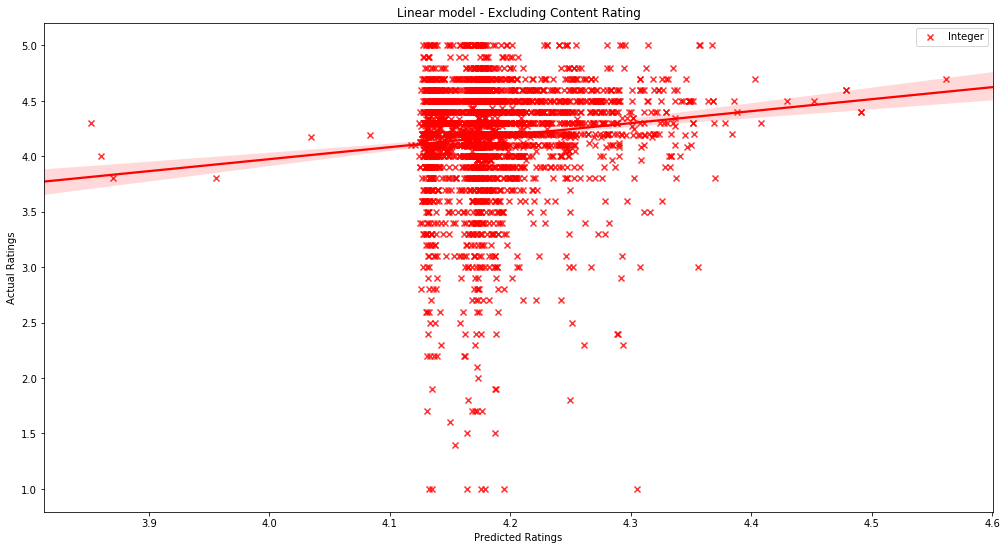

In [0]:
plt.figure(figsize=(17,9))
sns.regplot(Results,y_test,color='red', label = 'Integer', marker = 'x')
plt.legend()
plt.title('Linear model - Excluding Content Rating')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()


In [0]:
print ('Actual mean of rating:',y.mean())
print ('Integer encoding(mean) :',Results.mean())
print ('Integer encoding(std) :',Results.std())


Actual mean of rating: 4.182537297890685
Integer encoding(mean) : 4.185217951930335
Integer encoding(std) : 0.05078630539654337
